In [1]:
import numpy as np
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt
%matplotlib inline
import time
import rebound
import xgboost as xgb
import sklearn
import os
from sklearn.model_selection import cross_val_score

/mnt/raid-cita/nhussain/venv-2.7.13/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#data_files = os.listdir()

data_L_10 = pd.read_csv("../csvs/sifOrbs=1000.0Nout=100window=10lyapwindow=10.csv", index_col=0)
data_L_5 = pd.read_csv("../csvs/sifOrbs=1000.0Nout=100window=10lyapwindow=5.csv", index_col=0)
data_L_20 = pd.read_csv("../csvs/sifOrbs=1000.0Nout=100window=10lyapwindow=20.csv", index_col=0)
data_L_50 = pd.read_csv("../csvs/sifOrbs=1000.0Nout=100window=10lyapwindow=50.csv", index_col=0)
data_L_100 = pd.read_csv("../csvs/Ignore/sifOrbs=10000.0Nout=100window=10lyapwindow=100.csv", index_col=0)

data_L_10.head()

,runstring,t_final_short,Rel_Eerr_short,avg_a1,std_a1,max_a1,min_a1,norm_std_a1,norm_max_a1,norm_std_window10_a1,...,avg_ecross3,std_ecross3,max_ecross3,min_ecross3,norm_a3_slope,Lyapunov_time,wall_time,Stable,instability_time,Rel_Eerr
0,0000000.bin,1000.0,1.685900e-08,1.000186,0.000383,1.001325,0.999690,0.000382,0.001139,0.000397,...,0.283495,0.000804,0.099917,0.004461,-4.550069e-09,498.172786,1.049691,0.0,1.235644e+07,1.099985e-04
1,0000001.bin,1000.0,3.951208e-08,1.000223,0.000272,1.001385,0.999928,0.000272,0.001161,0.000142,...,0.161194,0.001317,0.251954,0.235480,3.690566e-11,561.638532,1.053304,0.0,1.348749e+05,1.388587e-08
2,0000002.bin,1000.0,7.106941e-07,0.998432,0.001887,1.002179,0.995653,0.001890,0.003753,0.001577,...,0.035012,0.000116,0.008301,0.006980,1.129681e-10,582.309925,1.040091,0.0,1.276381e+04,3.048261e-04
3,0000003.bin,1000.0,1.408400e-09,1.000006,0.000024,1.000104,0.999986,0.000024,0.000098,0.000019,...,0.514998,0.000454,0.301741,0.297554,-7.120011e-11,6934.449662,0.987406,1.0,1.000000e+09,6.492574e-10
4,0000004.bin,1000.0,2.413914e-04,0.999908,0.000563,1.000964,0.998426,0.000563,0.001482,0.000322,...,0.280696,0.179040,0.501270,0.181689,-8.570641e-08,445.578373,1.045580,0.0,8.791888e+01,9.336734e-07


In [116]:
#"['daOverRH1' 'daOverRH2' 'mindaOverRH' 'maxdaOverRH' 'norm_LyapunovTime']"
features = []
features += ['avg_iH1', 'avg_iH2']
#features += ['mindaOverRH', 'maxdaOverRH']
features += ['norm_std_a1', 'norm_max_a1', 'norm_std_window10_a1', 'norm_max_window10_a1']
features += ['norm_std_a2', 'norm_max_a2', 'norm_std_window10_a2', 'norm_max_window10_a2']
features += ['norm_std_a3', 'norm_max_a3', 'norm_std_window10_a3', 'norm_max_window10_a3']
features += ['avg_ecross1', 'std_ecross1', 'max_ecross1', 'min_ecross1']
features += ['avg_ecross2', 'std_ecross2', 'max_ecross2', 'min_ecross2']
features += ['avg_ecross3', 'std_ecross3', 'max_ecross3', 'min_ecross3']
features += ['norm_a1_slope', 'norm_a2_slope', 'norm_a3_slope']
#features += ['Lyapunov_time']
features2= features[:] + ['Lyapunov_time']
print len(features), len(features2)
data_files = [data_L_5, data_L_10, data_L_20, data_L_50, data_L_100]
X_vals = []
Y_vals = []

X_vals_Lya = []
#Y_vals =np.zeros((data_L_10.shape[0], 4) )
#X_vals = np.zeros((data_L_10.shape[0], len(features), 4))
for i, data in enumerate(data_files):
    Y_vals.append(data["Stable"])
    data_feats =data[features]
    X_vals.append(data_feats)
    X_vals_Lya.append(data[features2])
#= data['Stable']
#X = data[features]
#X.head()



29 30


In [112]:
Nrows = int(data_L_10.shape[0]* 0.6)
print Nrows
#trainX = X.loc[:Nrows]
#testX = X.loc[Nrows:]
#print trainX.shape, testX.shape



14999


In [5]:
start = time.time()
min_child_w = 3
n_est=100
max_d = 8
learning_r = 0.01
model2 = xgb.XGBClassifier(min_child_weight=min_child_w, n_estimators=n_est, max_depth=max_d, learning_rate=learning_r)
params = model2.get_xgb_params()


In [117]:
scores = []
wall_time = []
lyapunov_scores=[]
for i, data in enumerate(X_vals):
    print data.shape
    dtrain = xgb.DMatrix(X_vals[i], label=Y_vals[i])
    score = xgb.cv(params, dtrain, metrics = "auc", nfold=5, verbose_eval=True)
    # cross_val_score(estimator=model2, n_jobs=-1, cv = 5, X = X_vals[i], y = Y_vals[i], scoring ='average_precision', verbose = 5)
    print np.mean(score['test-auc-mean'])    #scores.append(score)
    scores.append(np.mean(score['test-auc-mean']))
    wall_time.append( np.mean(data_files[i]["wall_time"]))
    
    dtrain = xgb.DMatrix(X_vals_Lya[i], label=Y_vals[i])
    score = xgb.cv(params, dtrain, metrics = "auc", nfold=5, verbose_eval=True)
    # cross_val_score(estimator=model2, n_jobs=-1, cv = 5, X = X_vals[i], y = Y_vals[i], scoring ='average_precision', verbose = 5)
    print np.mean(score['test-auc-mean'])    #scores.append(score)
    lyapunov_scores.append(np.mean(score['test-auc-mean']))
end = time.time()
print "Time Taken",  (end - start)

(24999, 29)
[0]	train-auc:0.966767+0.00108009	test-auc:0.947922+0.0027537
[1]	train-auc:0.968609+0.00112729	test-auc:0.949767+0.00312749
[2]	train-auc:0.969752+0.000723237	test-auc:0.951229+0.00237199
[3]	train-auc:0.970425+0.000820562	test-auc:0.951872+0.00253856
[4]	train-auc:0.971484+0.00148836	test-auc:0.952845+0.00289139
[5]	train-auc:0.971797+0.00112761	test-auc:0.953335+0.00257452
[6]	train-auc:0.972912+0.00161781	test-auc:0.954785+0.00296994
[7]	train-auc:0.973675+0.00149462	test-auc:0.955627+0.00250785
[8]	train-auc:0.974435+0.00140902	test-auc:0.95655+0.00230586
[9]	train-auc:0.974761+0.00142018	test-auc:0.956773+0.00224627
0.95307054
[0]	train-auc:0.966904+0.00109211	test-auc:0.947879+0.00337584
[1]	train-auc:0.968558+0.00134493	test-auc:0.949628+0.00348467
[2]	train-auc:0.96986+0.00094244	test-auc:0.95105+0.00283498
[3]	train-auc:0.970455+0.00116115	test-auc:0.951748+0.00319221
[4]	train-auc:0.971582+0.00182795	test-auc:0.952716+0.00356476
[5]	train-auc:0.971934+0.00148892	

We can conclude from the results above that altering the Lyapunov smoothing window did not seem to affect the results significantly. Based on that, the dataset bleow should still have decent score, even though the Lyapunov time is the same for all of them . Oddly enough, it seems to do best on this one. 

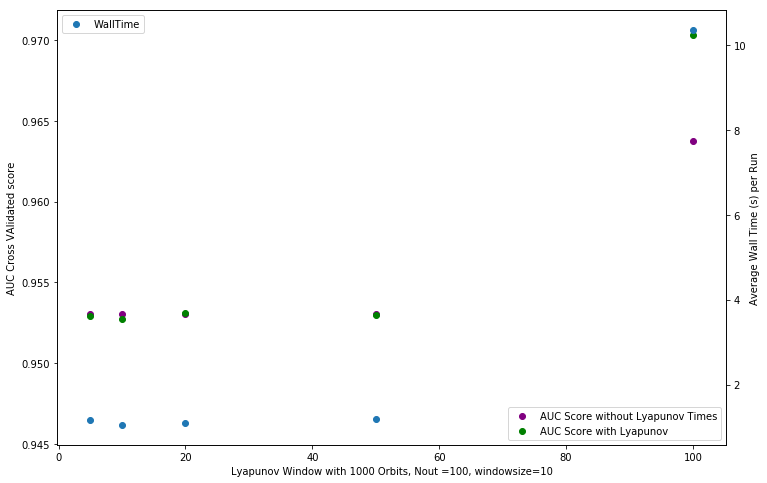

In [121]:
Lya_window = [5, 10, 20, 50, 100]
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot("111")
ax2 = ax.twinx()
ax.scatter(Lya_window, scores, label="AUC Score without Lyapunov Times", color = "purple",)
ax.scatter(Lya_window, lyapunov_scores, label="AUC Score with Lyapunov", color = "green",)

ax2.scatter(Lya_window, wall_time, label = "WallTime")
ax.legend(loc = 4)
ax.set_xlabel("Lyapunov Window with 1000 Orbits, Nout =100, windowsize=10")
ax.set_ylabel("AUC Cross VAlidated score")
ax2.set_ylabel("Average Wall Time (s) per Run")
ax2.legend(loc = 2)

Try comparing how performance varies with shorter integration length orbits

In [123]:
#try loading the 1000 and see how does performance compare
data_L_50 = pd.read_csv("../csvs/sifOrbs=10000.0Nout=100window=10lyapwindow=50.csv", index_col=0)
data_L_20 = pd.read_csv("../csvs/sifOrbs=10000.0Nout=100window=10lyapwindow=20.csv", index_col=0)
data_L_5 = pd.read_csv("../csvs/sifOrbs=10000.0Nout=100window=10lyapwindow=5.csv", index_col=0)
data_L_10 = pd.read_csv("../csvs/short_integration_features.csv", index_col=0)

features = []
features += ['avg_iH1', 'avg_iH2']
#features += ['mindaOverRH', 'maxdaOverRH']
features += ['norm_std_a1', 'norm_max_a1']#, 'norm_std_window10_a1', 'norm_max_window10_a1']
features += ['norm_std_a2', 'norm_max_a2']#, 'norm_std_window10_a2', 'norm_max_window10_a2']
features += ['norm_std_a3', 'norm_max_a3']#, 'norm_std_window10_a3', 'norm_max_window10_a3']
features += ['avg_ecross1', 'std_ecross1', 'max_ecross1', 'min_ecross1']
features += ['avg_ecross2', 'std_ecross2', 'max_ecross2', 'min_ecross2']
features += ['avg_ecross3', 'std_ecross3', 'max_ecross3', 'min_ecross3']
features += ['norm_a1_slope', 'norm_a2_slope', 'norm_a3_slope']
features += ['Lyapunov_time']

In [43]:
data_files = [data_L_5, data_L_10, data_L_20, data_L_50]
X_vals = []
Y_vals = []

for i, data in enumerate(data_files):
    Y_vals.append(data["Stable"])
    data_feats =data[features]
    X_vals.append(data_feats)


min_child_w = 3
n_est=100
max_d = 8
learning_r = 0.01
model2 = xgb.XGBClassifier(min_child_weight=min_child_w, n_estimators=n_est, max_depth=max_d, learning_rate=learning_r)
params = model2.get_xgb_params()
scores2 = []
wall_time2 = []

for i, data in enumerate(X_vals):
    print data.shape
    dtrain = xgb.DMatrix(X_vals[i], label=Y_vals[i])
    score = xgb.cv(params, dtrain, metrics = "auc", nfold=5, verbose_eval=True)
    # cross_val_score(estimator=model2, n_jobs=-1, cv = 5, X = X_vals[i], y = Y_vals[i], scoring ='average_precision', verbose = 5)
    print np.mean(score['test-auc-mean'])    #scores.append(score)
    scores2.append(np.mean(score['test-auc-mean']))
    try:
        wall_time2.append( np.mean(data_files[i]["wall_time"]))
    except:
        continue

(24999, 30)
[0]	train-auc:0.97478+0.000536995	test-auc:0.960226+0.00187035
[1]	train-auc:0.975874+0.000830823	test-auc:0.961297+0.00161938
[2]	train-auc:0.976878+0.000882969	test-auc:0.96234+0.00240805
[3]	train-auc:0.977493+0.0010184	test-auc:0.962956+0.00243898
[4]	train-auc:0.978485+0.00110222	test-auc:0.964233+0.00236016
[5]	train-auc:0.978797+0.00112704	test-auc:0.964491+0.00231412
[6]	train-auc:0.979105+0.00115789	test-auc:0.964955+0.00225114
[7]	train-auc:0.979952+0.000895524	test-auc:0.96612+0.00159308
[8]	train-auc:0.980287+0.000893678	test-auc:0.966383+0.00154256
[9]	train-auc:0.980607+0.000868102	test-auc:0.966712+0.0016021
0.96397134
(14999, 30)
[0]	train-auc:0.976095+0.000671135	test-auc:0.956582+0.00228305
[1]	train-auc:0.976713+0.000917288	test-auc:0.9571+0.00229102
[2]	train-auc:0.977269+0.00115963	test-auc:0.957406+0.00210074
[3]	train-auc:0.978291+0.00115487	test-auc:0.958765+0.00185293
[4]	train-auc:0.978907+0.000833266	test-auc:0.959706+0.00220174
[5]	train-auc:0.97

#try with data thats a scaled down version of running 10000 orbits   with Nout = 100, and bothe windows are 20

In [3]:
#See how performance drops for a given set of features:
path_name = "../csvs/ShortTimeScale/"
#data_list = os.listdir(path_name)
data_list = np.loadtxt(path_name+"Order.txt", dtype = str)
features = []
features += ['avg_iH1', 'avg_iH2']
features += ['norm_std_a1', 'norm_max_a1']#, 'norm_std_window10_a1', 'norm_max_window10_a1']
features += ['norm_std_a2', 'norm_max_a2']#, 'norm_std_window10_a2', 'norm_max_window10_a2']
features += ['norm_std_a3', 'norm_max_a3']#, 'norm_std_window10_a3', 'norm_max_window10_a3']
features += ['avg_ecross1', 'std_ecross1', 'max_ecross1', 'min_ecross1']
features += ['avg_ecross2', 'std_ecross2', 'max_ecross2', 'min_ecross2']
features += ['avg_ecross3', 'std_ecross3', 'max_ecross3', 'min_ecross3']
features += ['norm_a1_slope', 'norm_a2_slope', 'norm_a3_slope']
print data_list

['sifOrbs=1000.0Nout=100window=20lyapwindow=20.csv'
 'sifOrbs=300.0Nout=30window=6lyapwindow=6.csv'
 'sifOrbs=400.0Nout=40window=8lyapwindow=8.csv'
 'sifOrbs=500.0Nout=50window=10lyapwindow=10.csv'
 'sifOrbs=600.0Nout=60window=12lyapwindow=12.csv'
 'sifOrbs=700.0Nout=70window=14lyapwindow=14.csv'
 'sifOrbs=750.0Nout=75window=15lyapwindow=15.csv'
 'sifOrbs=800.0Nout=80window=16lyapwindow=16.csv'
 'sifOrbs=900.0Nout=90window=18lyapwindow=18.csv']


In [6]:
#print vals        
orbital_count = np.zeros(len(data_list))

wall_time3 = np.zeros_like(orbital_count)
scores3 = np.zeros_like(orbital_count)


for i, name in enumerate(data_list):
    data = pd.read_csv(path_name + name, index_col = 0)
    Y = data["Stable"]
    #generate feature list
    used_features = features[:]
    for feats in data.columns.values:
        if "window" in feats:
            used_features.append(feats) 
    X = data[used_features]
    
    #print data.shape
    dtrain = xgb.DMatrix(X, label = Y)
    #dtrain = xgb.DMatrix(X_vals[i], label=Y_vals[i])
    score = xgb.cv(params, dtrain, metrics = "auc", nfold=5, verbose_eval=True)
    # cross_val_score(estimator=model2, n_jobs=-1, cv = 5, X = X_vals[i], y = Y_vals[i], scoring ='average_precision', verbose = 5)
    print np.mean(score['test-auc-mean'])    #scores.append(score)
    scores3[i]=(np.mean(score['test-auc-mean']))
    wall_time3[i]=( np.mean(data["wall_time"]))
    orbital_count[i]=float(name.split("=")[1].split(".")[0])
    print orbital_count
    

[0]	train-auc:0.967277+0.00119307	test-auc:0.947399+0.00302397
[1]	train-auc:0.969031+0.00150298	test-auc:0.949284+0.00338722
[2]	train-auc:0.970441+0.00092652	test-auc:0.951077+0.00287032
[3]	train-auc:0.971152+0.00117619	test-auc:0.951828+0.0029454
[4]	train-auc:0.971668+0.000991593	test-auc:0.95235+0.00295477
[5]	train-auc:0.972413+0.00154421	test-auc:0.953167+0.00325945
[6]	train-auc:0.973233+0.00153967	test-auc:0.9544+0.00255183
[7]	train-auc:0.974204+0.00158626	test-auc:0.955467+0.00226859
[8]	train-auc:0.975085+0.0014088	test-auc:0.956517+0.00203222
[9]	train-auc:0.975458+0.00136596	test-auc:0.956744+0.00206411
0.95282322
[ 1000.     0.     0.     0.     0.     0.     0.     0.     0.]
[0]	train-auc:0.963456+0.000619851	test-auc:0.945384+0.00315884
[1]	train-auc:0.964574+0.000803451	test-auc:0.946534+0.00333066
[2]	train-auc:0.965265+0.00103211	test-auc:0.947272+0.0031646
[3]	train-auc:0.965699+0.000763561	test-auc:0.947675+0.00304436
[4]	train-auc:0.966698+0.000719496	test-auc:

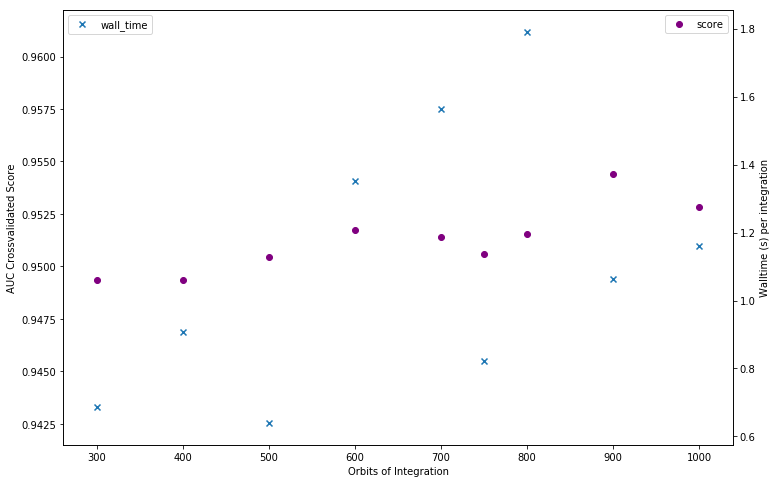

In [8]:
fig = plt.figure(figsize = (12, 8))
ax1 = fig.add_subplot("111")
ax1.scatter(orbital_count, scores3, color = "purple", label = "score")
p1 = ax2= ax1.twinx()
p2 = ax2.scatter(orbital_count, wall_time3, label = "wall_time", marker = "x")
#ax1.scatter(np.nan,np.nan,  marker = "x", color ="blue",  label = 'wall_time', s = 20)
#fig.legend(center)
#p_t = p1 +p2
#legend_labels = [x.get_label() for x in p_t]
#ax.legend(p_t, legend_labels, loc=0)
ax1.set_xlabel("Orbits of Integration")
ax2.set_ylabel("Walltime (s) per integration")
ax1.set_ylabel("AUC Crossvalidated Score")
ax1.legend(loc = 0)
ax2.legend(loc = 2)

Redo this with the above dataset, but with just one train test split as we want to see what kind of recall we retain with 90% precision

In [17]:
#print vals        
precision_vals = np.zeros_like(orbital_count)
recall_vals = np.zeros_like(orbital_count)
#wall_time3 = np.zeros_like(orbital_count)
#scores3 = np.zeros_like(orbital_count)


for i, name in enumerate(data_list):
    data = pd.read_csv(path_name + name, index_col = 0)
    Y = data["Stable"]
    #generate feature list
    used_features = features[:]
    for feats in data.columns.values:
        if "window" in feats:
            used_features.append(feats) 
    X = data[used_features]
    #create a stratified 0.8 0.2 split
    trainX, testX, trainY, testY = sklearn.model_selection.train_test_split(X, Y,random_state = 0, stratify = Y, test_size = 0.2)
    model2.fit(trainX, trainY)
    preds = model2.predict(testX)
    preds_proba = model2.predict_proba(testX)
    score =sklearn.metrics.average_precision_score(testY, preds)
    print "AUC Score", score
    precision, recall, thresholds = sklearn.metrics.precision_recall_curve(testY, preds_proba[:,1])
    for j, vals in enumerate(precision):
        if vals >= 0.9:
            #print recall, thresholds
            recall_vals[i] = recall[j]
            precision_vals[i] = precision[j]
            print recall_vals[i], precision_vals[i] 
            break
print recall_vals, precision_vals
    

AUC Score 0.901667730411
0.851664984864 0.900266666667
AUC Score 0.900923704602
0.846619576186 0.900214592275
AUC Score 0.904327025583
0.846115035318 0.900161030596
AUC Score 0.903747508237
0.846115035318 0.900161030596
AUC Score 0.903419990381
0.847628657921 0.900321543408
AUC Score 0.905621663381
0.852169525732 0.900319829424
AUC Score 0.904736836346
0.837033299697 0.900162778079
AUC Score 0.901583868499
0.847124117053 0.900268096515
AUC Score 0.904295754063
0.85015136226 0.900106837607
[ 0.85166498  0.84661958  0.84611504  0.84611504  0.84762866  0.85216953
  0.8370333   0.84712412  0.85015136] [ 0.90026667  0.90021459  0.90016103  0.90016103  0.90032154  0.90031983
  0.90016278  0.9002681   0.90010684]


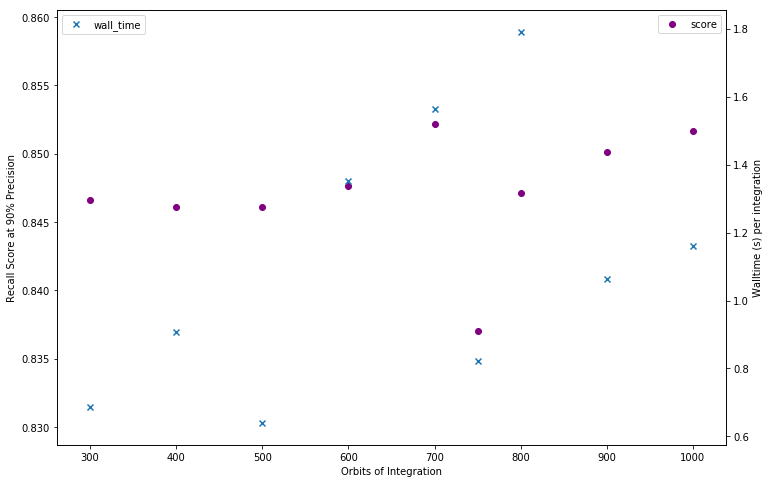

In [19]:
fig = plt.figure(figsize = (12, 8))
ax1 = fig.add_subplot("111")
ax1.scatter(orbital_count, recall_vals, color = "purple", label = "score")
p1 = ax2= ax1.twinx()
p2 = ax2.scatter(orbital_count, wall_time3, label = "wall_time", marker = "x")
#ax1.scatter(np.nan,np.nan,  marker = "x", color ="blue",  label = 'wall_time', s = 20)
#fig.legend(center)
#p_t = p1 +p2
#legend_labels = [x.get_label() for x in p_t]
#ax.legend(p_t, legend_labels, loc=0)
ax1.set_xlabel("Orbits of Integration")
ax2.set_ylabel("Walltime (s) per integration")
ax1.set_ylabel("Recall Score at 90% Precision")
ax1.legend(loc = 0)
ax2.legend(loc = 2)
fig.savefig("../Figures/ScoresAt90PrecisionShortIntegration.png")

In [127]:
#try comparing performace over a wider timescale
#See how performance drops for a given set of features:
path_name = "../csvs/LargeTimeScaleRange/"
#data_list = os.listdir(path_name)
data_list = np.loadtxt(path_name+"Order.txt", dtype = str)
features = []
features += ['avg_iH1', 'avg_iH2']
features += ['norm_std_a1', 'norm_max_a1', 'norm_std_window10_a1', 'norm_max_window10_a1']
features += ['norm_std_a2', 'norm_max_a2', 'norm_std_window10_a2', 'norm_max_window10_a2']
features += ['norm_std_a3', 'norm_max_a3', 'norm_std_window10_a3', 'norm_max_window10_a3']
features += ['avg_ecross1', 'std_ecross1', 'max_ecross1', 'min_ecross1']
features += ['avg_ecross2', 'std_ecross2', 'max_ecross2', 'min_ecross2']
features += ['avg_ecross3', 'std_ecross3', 'max_ecross3', 'min_ecross3']
features += ['norm_a1_slope', 'norm_a2_slope', 'norm_a3_slope']
features += ['Lyapunov_time']
print data_list

['sifOrbs=1000.0Nout=100window=10lyapwindow=10.csv'
 'sifOrbs=100.0Nout=10window=10lyapwindow=10.csv'
 'sifOrbs=10.0Nout=10window=10lyapwindow=10.csv'
 'sifOrbs=32000.0Nout=1000window=10lyapwindow=10.csv'
 'sifOrbs=3200.0Nout=100window=10lyapwindow=10.csv'
 'sifOrbs=320.0Nout=10window=10lyapwindow=10.csv'
 'sifOrbs=32.0Nout=10window=10lyapwindow=10.csv']


In [128]:
#print vals        
orbital_count = np.zeros(len(data_list))

wall_time_long_range = np.zeros_like(orbital_count)
scores_long_range = np.zeros_like(orbital_count)


for i, name in enumerate(data_list):
    data = pd.read_csv(path_name + name, index_col = 0)
    Y = data["Stable"]  
    X = data[features]
    
    #print data.shape
    dtrain = xgb.DMatrix(X, label = Y)
    #dtrain = xgb.DMatrix(X_vals[i], label=Y_vals[i])
    score = xgb.cv(params, dtrain, metrics = "auc", nfold=5, verbose_eval=True)
    # cross_val_score(estimator=model2, n_jobs=-1, cv = 5, X = X_vals[i], y = Y_vals[i], scoring ='average_precision', verbose = 5)
    print np.mean(score['test-auc-mean'])    #scores.append(score)
    scores_long_range[i]=(np.mean(score['test-auc-mean']))
    wall_time_long_range[i]=( np.mean(data["wall_time"]))
    orbital_count[i]=float(name.split("=")[1].split(".")[0])
    print orbital_count


[0]	train-auc:0.966713+0.00124129	test-auc:0.947862+0.00272502
[1]	train-auc:0.96859+0.00145958	test-auc:0.949467+0.00309808
[2]	train-auc:0.9699+0.0006461	test-auc:0.951057+0.00217161
[3]	train-auc:0.970386+0.001137	test-auc:0.951576+0.00259662
[4]	train-auc:0.971418+0.0016313	test-auc:0.952487+0.00301291
[5]	train-auc:0.971801+0.00138088	test-auc:0.953079+0.0028101
[6]	train-auc:0.972778+0.00199606	test-auc:0.954581+0.00322851
[7]	train-auc:0.973291+0.00201604	test-auc:0.955056+0.00328163
[8]	train-auc:0.974128+0.00215357	test-auc:0.955946+0.00313038
[9]	train-auc:0.974742+0.0016456	test-auc:0.956491+0.00248507
0.9527601
[ 1000.     0.     0.     0.     0.     0.     0.]
[0]	train-auc:0.958254+0.00158946	test-auc:0.938934+0.00363064
[1]	train-auc:0.96096+0.0018966	test-auc:0.941926+0.00463672
[2]	train-auc:0.962969+0.000634386	test-auc:0.944394+0.00243103
[3]	train-auc:0.963536+0.000550097	test-auc:0.94505+0.00249654
[4]	train-auc:0.964027+0.000720385	test-auc:0.945404+0.00203022
[5]

NameError: name 'scores_long_range' is not defined

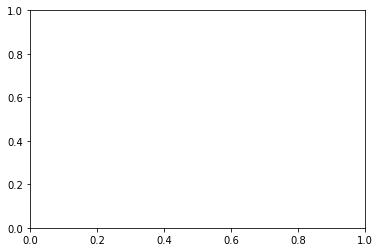

In [7]:
fig = plt.figure()
ax = fig.add_subplot("111")
ax.scatter(orbital_count, scores_long_range, color = "green", label = "AUC Score")
ax2 = ax.twinx()
#plt.figure()
ax2.scatter(orbital_count, wall_time_long_range, label = "Wall time")
ax.legend(loc=2)
ax2.legend(loc=4)

In [ ]:
#work with the highest performing datset on this to see which features are important
